## Additional Assumption
1. For the startup that has the same name, we will ignore the permalink, so we will treat it duplicated data based on another data field.
2. Some date has non sense order, logically it should be founded_at < first_funding_at < last_funding_at, so we will convert it to None value.
3. We set threshold for category_list count, if it less than threshold we will impute 'Others' value.

# Preparation

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile

## Import Data

In [2]:
with ZipFile('big-startup-secsees-fail-dataset-from-crunchbase.zip') as raw_zip:
    raw_zip.extractall(path='datasets')
    
    raw_data = pd.read_csv('datasets/big_startup_secsees_dataset.csv')

In [3]:
raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


# Exploratory Data Analysis and Data Cleaning

## Data Counts

In [4]:
raw_data.shape

(66368, 14)

## Data Fields Information

In [5]:
raw_data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

1. permalink: Link to Organization
2. name: Company Name
3. homepage_url: Startup Site
4. category_list: Field of company
5. funding_total_usd: Total Funding in USD
6. status: Operating Status
7. country_code: Country Code
8. state_code: State Code of company location
9. region: Region of company location
10. city: Cit of company location
11. funding_rounds: the number of times a startup opts to raise capital from the market.
12. founded_at: the date when the startup is founded
13. first_funding_at: the date when the startup get first funding
14. last_funding_at: the date when the startup get last funding

## Visualize the Target Data (Status)

<Axes: >

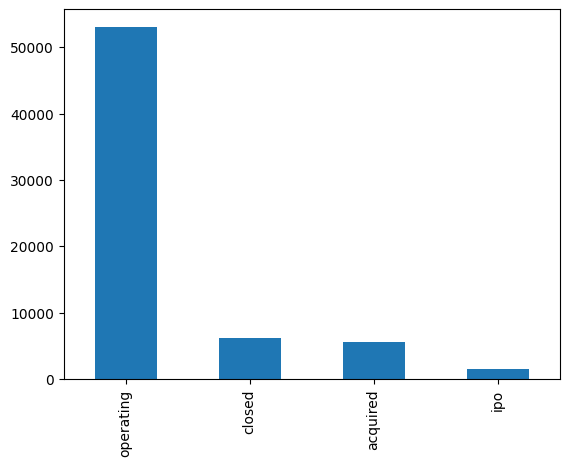

In [6]:
raw_data['status'].value_counts().plot(kind='bar')

Our objective is to find whether the startup will fail (closed) or success (acquier/ipo), so **we don't need operating status. We will drop these rows.**

In [7]:
success_startup = np.logical_or(raw_data['status'] == 'ipo', raw_data['status'] == 'acquired')
fail_startup = raw_data['status'] == 'closed'

raw_data['status'][fail_startup] = 'fail'
raw_data['status'][success_startup] = 'success'

/tmp/ipykernel_13758/516772136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['status'][fail_startup] = 'fail'
/tmp/ipykernel_13758/516772136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['status'][success_startup] = 'success'


In [8]:
valid_index = (~(raw_data['status'] == 'operating'))

raw_data = raw_data[valid_index]

raw_data

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66349,/organization/zyncro,Zyncro,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520,success,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
66350,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,Pharmaceuticals,13000000,success,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
66352,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786,success,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-01-01,2011-02-18
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877,fail,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


<Axes: >

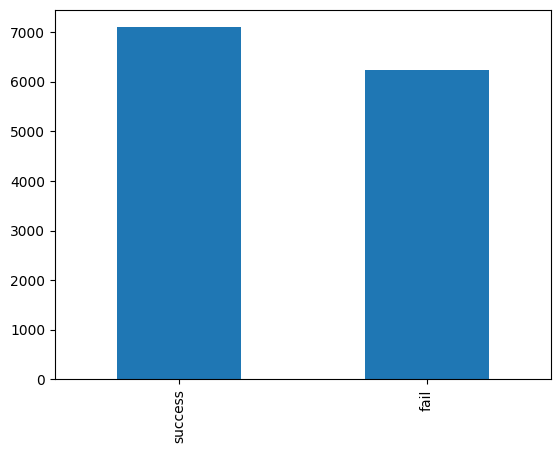

In [9]:
raw_data['status'].value_counts().plot(kind='bar')

## Check Duplicate Startup Name

In [10]:
check_name = raw_data['name'].value_counts()

check_name[check_name > 1]

SpaceConnect              2
SquareOne                 2
Stream                    2
Bloodhound                2
Stupsr                    2
Cardiovascular Systems    2
SHIFT                     2
Archive                   2
Name: name, dtype: int64

There are 8 duplicated startup name, lets check wheter the startup has the same name or the data is just duplicated by checking the other column and ignore the permalink column (we assume this column is an effect of duplicated input).

In [11]:
duplicate_name = check_name[check_name > 1].index

duplicate_inspect = raw_data[raw_data['name'].str.fullmatch('|'.join(duplicate_name)) == True]

duplicate_inspect

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
4120,/organization/archive,Archive,NaN,NaN,-,success,USA,CA,Anaheim,Costa Mesa,1,1980-01-01,1990-05-14,1990-05-14
4121,/organization/archive-2,Archive,http://www.archive.com,Apps|B2B|Service Providers,18000000,fail,USA,CA,Los Angeles,Culver City,1,NaN,2000-10-23,2000-10-23
7537,/organization/bloodhound,Bloodhound,http://bloodhound.com,Mobile,4770000,fail,USA,CA,SF Bay Area,San Francisco,4,2011-09-01,2011-08-24,2013-01-23
7538,/organization/bloodhound-2,Bloodhound,http://www.bloodhoundinc.com/,Application Platforms|Medical|Services,3000000,fail,USA,NC,Raleigh,Durham,1,NaN,2002-11-26,2002-11-26
9738,/organization/cardiovascular-systems,Cardiovascular Systems,http://www.csi360.com,Biotechnology|Medical Devices,15000000,success,USA,MN,Minneapolis,Saint Paul,2,1989-01-01,2010-12-13,2013-03-12
9739,/organization/cardiovascular-systems-incorporated,Cardiovascular Systems,http://www.csi360.com/,Medical Devices,11220000,success,USA,MN,MN - Other,South Saint Paul,1,NaN,2008-01-09,2008-01-09
51149,/organization/shift,SHIFT,http://www.shift.com,Advertising|Consumer Goods|Facebook Applicatio...,14000000,success,USA,CA,Los Angeles,Santa Monica,4,2010-01-01,2011-02-01,2013-12-10
51151,/organization/shift-4,SHIFT,http://www.shiftinc.jp/,NaN,-,success,NaN,NaN,NaN,NaN,1,2005-09-01,2013-06-01,2013-06-01
53581,/organization/spaceconnect,SpaceConnect,NaN,NaN,38126,fail,NaN,NaN,NaN,NaN,1,NaN,2015-04-01,2015-04-01
53582,/organization/spaceconnect-2,SpaceConnect,http://www.spaceconnect.co,Algorithms|Office Space|Professional Services,38126,fail,AUS,2,Sydney,Sydney,1,2015-03-08,2015-04-01,2015-04-01


In [12]:
column_dupe = ['homepage_url', 'category_list', 'funding_total_usd', 'city', 'founded_at',
               'first_funding_at', 'last_funding_at']

temp_dupe = duplicate_inspect.copy()

for column in column_dupe:
    unique_index = duplicate_inspect[['name', column]].drop_duplicates().index
    
    duplicate_inspect = duplicate_inspect.loc[unique_index]

In [13]:
raw_data = raw_data.drop(set(temp_dupe.index) - set(duplicate_inspect.index), errors='ignore')

raw_data

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66349,/organization/zyncro,Zyncro,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520,success,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
66350,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,Pharmaceuticals,13000000,success,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
66352,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786,success,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-01-01,2011-02-18
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877,fail,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


**We reduce our data from 13334 to 13331 by removing 3 duplicates data** based on inspection from other column.

## Check Data Types

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13331 entries, 15 to 66360
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          13331 non-null  object
 1   name               13330 non-null  object
 2   homepage_url       12116 non-null  object
 3   category_list      12247 non-null  object
 4   funding_total_usd  13331 non-null  object
 5   status             13331 non-null  object
 6   country_code       11342 non-null  object
 7   state_code         11124 non-null  object
 8   region             11181 non-null  object
 9   city               11181 non-null  object
 10  funding_rounds     13331 non-null  int64 
 11  founded_at         9600 non-null   object
 12  first_funding_at   13329 non-null  object
 13  last_funding_at    13331 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.5+ MB


**The funding_total_usd data type is wrong, it should be float.** Lets check how many data that have '-' element, then convert it into numeric data.

In [15]:
(raw_data['funding_total_usd'] == '-').value_counts()

False    11141
True      2190
Name: funding_total_usd, dtype: int64

In [16]:
raw_data['funding_total_usd'] = pd.to_numeric(
    arg=raw_data['funding_total_usd'],
    errors='coerce',
    downcast='float'
)

raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000.0,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000.0,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000.0,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08


Lets check again the NaN value after the conversion.

In [17]:
raw_data['funding_total_usd'].isna().value_counts()

False    11141
True      2190
Name: funding_total_usd, dtype: int64

It's fit with our assumption if non-numeric data only contains '-', hence we can conclude that all non-numeric data is '-', not number with string (e.g. 10 mil usd).

## Numerical Data

In [18]:
num_data = raw_data.select_dtypes(exclude='object')

### Data Distribution

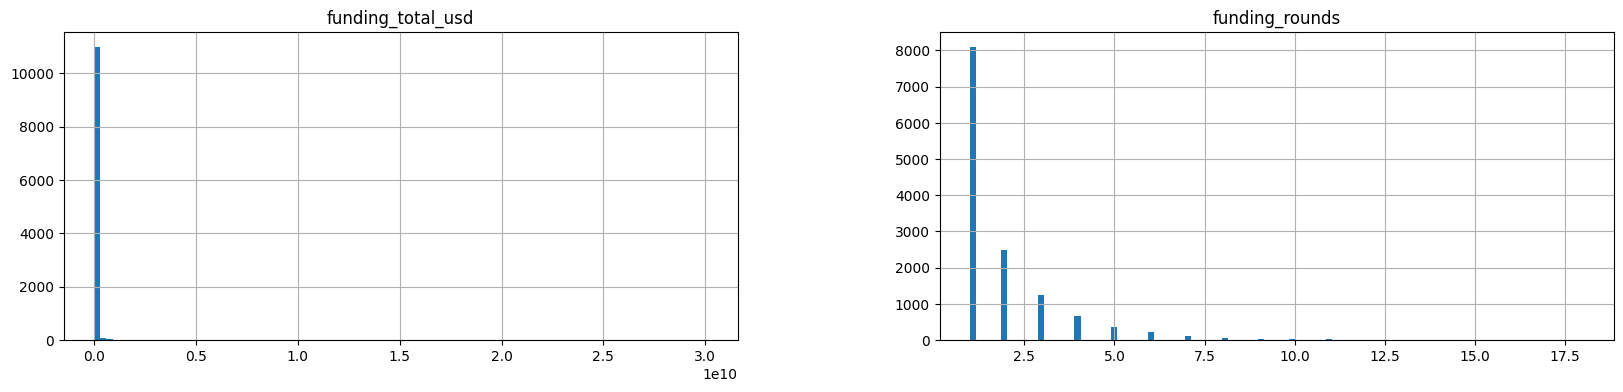

In [19]:
num_data.hist(bins=100, figsize=(20, 4))

plt.show()

The funding_total_usd column distribution is hard to see, since it has a lot of outliers. So lets inspect the funding_total_usd column.

In [20]:
num_data['funding_total_usd'].describe()

count    1.114100e+04
mean     3.581505e+07
std      3.687884e+08
min      2.000000e+00
25%      1.000000e+06
50%      5.800000e+06
75%      2.200000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

**The minimum value is 2 usd, which is doesn't make any sense**, there is no way someone is funding a startup by 2 usd (it could be an invalid input). Lets check it further by using interquartile rule to find outliers.

### Remove Outliers

In [21]:
def find_outliers(data):
    data = np.array(data.dropna())
    
    inter_quant = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    
    upper_bound = np.quantile(data, 0.75) + 1.5*inter_quant
    lower_bound = np.quantile(data, 0.25) - 1.5*inter_quant
    
    lower_outliers = data < lower_bound
    upper_outliers = data > upper_bound
    
    return pd.Series(lower_outliers | upper_outliers)

In [22]:
outliers_funding = find_outliers(num_data['funding_total_usd'])

outliers_funding

0        False
1        False
2        False
3        False
4        False
         ...  
11136    False
11137    False
11138     True
11139    False
11140    False
Length: 11141, dtype: bool

Lets check if our desired outliers (small number) still exist or not.

In [23]:
num_data['funding_total_usd'].dropna().reset_index(drop=True)[~outliers_funding].describe()

count    9.853000e+03
mean     9.510701e+06
std      1.222059e+07
min      2.000000e+00
25%      7.000000e+05
50%      4.000000e+06
75%      1.398821e+07
max      5.350000e+07
Name: funding_total_usd, dtype: float64

Nope, **the interquartile method just remove the upper outliers. Which is in this context, it still possible for startup to get up to $1x10^{10}$ usd fund, so lets keep the upper bound outliers.** We will consider another method to remove lower bound outliers. **Let set a threshold for 1000 usd, it means anything under 1000 usd fund considered as invalid input.**

In [24]:
valid_input = ~(num_data['funding_total_usd'] < 1000)

num_data[['funding_total_usd']][valid_input]

,funding_total_usd
15,5000000.0
20,500000.0
23,2535000.0
31,1250000.0
32,35000000.0
...,...
66349,3805520.0
66350,13000000.0
66352,866550786.0
66358,15419877.0


**Lets drop the row that has invalid input in funding_total_usd column.**

In [25]:
invalid_input_id = num_data[['funding_total_usd']][~valid_input].index

num_data = num_data.drop(invalid_input_id, axis=0)

Lets visualize the distribution.

In [26]:
num_data['funding_total_usd'].describe()

count    1.113700e+04
mean     3.582791e+07
std      3.688540e+08
min      1.000000e+03
25%      1.000000e+06
50%      5.800000e+06
75%      2.200000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

## Categorical Data

In [27]:
cat_data = raw_data.select_dtypes(include='object')

cat_data.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,success,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,success,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,success,USA,CA,SF Bay Area,San Francisco,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,success,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,success,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08


In [28]:
cat_data.nunique()

permalink           13331
name                13325
homepage_url        12099
category_list        5746
status                  2
country_code           84
state_code            209
region                595
city                 1711
founded_at           1636
first_funding_at     3789
last_funding_at      3666
dtype: int64

The `permalink` and `name` columns are almost unique, hence we will drop these columns.

In [29]:
cat_data = cat_data.drop(['permalink', 'name'], axis=1)

cat_data.head()

,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at
15,http://www.1mainstream.com,Apps|Cable|Distribution|Software,success,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17
20,http://www.1000markets.com,Art|E-Commerce|Marketplaces,success,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15
23,http://1000memories.com,Curated Web,success,USA,CA,SF Bay Area,San Francisco,2010-07-01,2010-01-01,2011-02-16
31,http://www.100plus.com,Analytics,success,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30
32,http://www.1010data.com,Software,success,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08


### homepage_url

Based on `homepage_url`, the structure of url of website can be divided into protocol, subdomain, and domain name (can be divided into the name itself and top level domain). Since the subdomain is mainly www and domain name is representing the name itself, we will divide the `homepage_url` into `protocol_url` and `top_level_domain`.

In [30]:
# protocol url
cat_data['protocol_url'] =  cat_data['homepage_url'].str.split(':').str[0]

# top level domain url
cat_data['top_level_domain_url'] = cat_data['homepage_url'].str.split('.', n=2).str[-1].str.split('/').str[0]

cat_data = cat_data.drop('homepage_url', axis=1)

cat_data.head()

,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at,protocol_url,top_level_domain_url
15,Apps|Cable|Distribution|Software,success,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17,http,com
20,Art|E-Commerce|Marketplaces,success,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15,http,com
23,Curated Web,success,USA,CA,SF Bay Area,San Francisco,2010-07-01,2010-01-01,2011-02-16,http,com
31,Analytics,success,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30,http,com
32,Software,success,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08,http,com


### category_list

In [31]:
count_categories = cat_data['category_list'].value_counts()

count_categories

Software                                                                             917
Biotechnology                                                                        807
Curated Web                                                                          373
Mobile                                                                               272
Enterprise Software                                                                  247
                                                                                    ... 
E-Commerce|Facebook Applications                                                       1
Collaborative Consumption|E-Commerce|Marketplaces|Tourism|Travel                       1
Apps|Internet                                                                          1
Business Services|Curated Web|Design|Games|Internet Marketing|Social Media|Sports      1
Facebook Applications|Games|Networking|Technology                                      1
Name: category_list, 

As we can see, **startup that has multiple categories treated as unique, change the form into a list.**
<br>
We can see a pattern here, it consider multiple categories when '|' appears, so lets find these values

In [32]:
mul_categories = count_categories.index.str.replace('|', ',').str.contains(',')

mul_categories

/tmp/ipykernel_13758/235368749.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mul_categories = count_categories.index.str.replace('|', ',').str.contains(',')


array([False, False, False, ...,  True,  True,  True])

In [33]:
cat_data['category_list'] = cat_data['category_list'].fillna('Others').str.split('|')

cat_data.head()

,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at,protocol_url,top_level_domain_url
15,"[Apps, Cable, Distribution, Software]",success,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17,http,com
20,"[Art, E-Commerce, Marketplaces]",success,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15,http,com
23,[Curated Web],success,USA,CA,SF Bay Area,San Francisco,2010-07-01,2010-01-01,2011-02-16,http,com
31,[Analytics],success,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30,http,com
32,[Software],success,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08,http,com


### Datetime Columns

In [34]:
temp_df = cat_data[['founded_at', 'first_funding_at', 'last_funding_at']]

for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
    temp_df[item] = pd.to_datetime(raw_data[item], errors='coerce')

/tmp/ipykernel_13758/2863312027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item] = pd.to_datetime(raw_data[item], errors='coerce')
/tmp/ipykernel_13758/2863312027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item] = pd.to_datetime(raw_data[item], errors='coerce')
/tmp/ipykernel_13758/2863312027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

#### Data Distribution

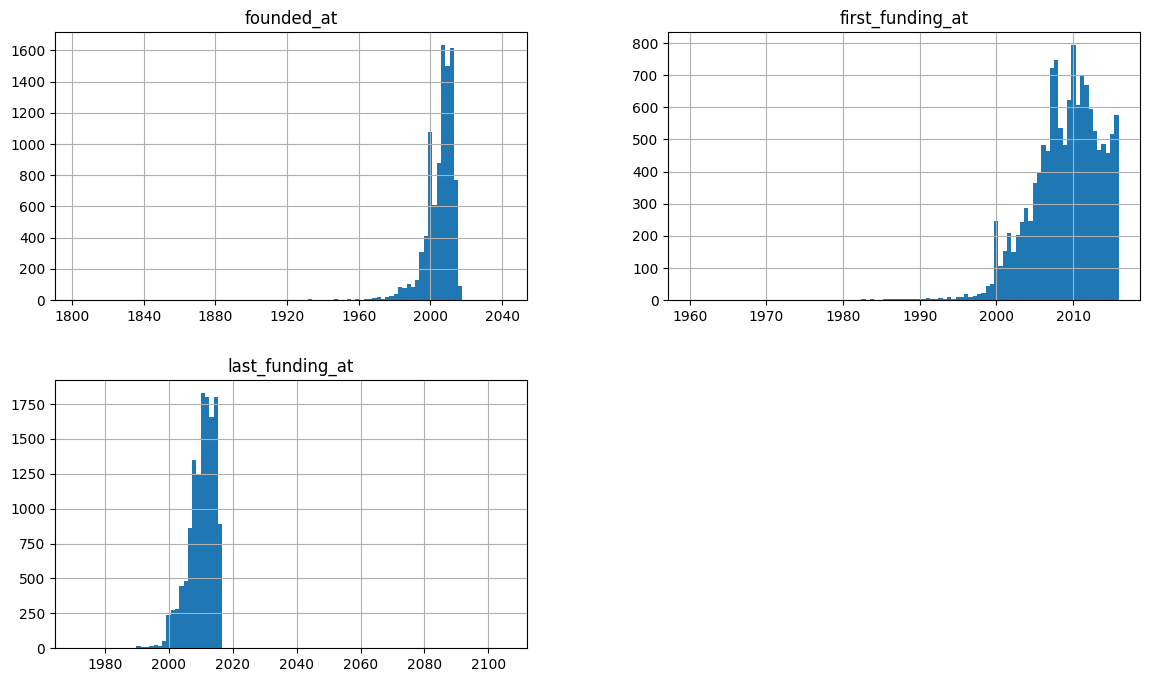

In [35]:
temp_df.hist(
    bins=100,
    figsize=(14, 8)
)

plt.show()

#### Remove Outliers

It look a like **there is date that is greater than today (2023).** Let's drop them..

In [36]:
invalid_year_index = []

for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
    mask_invalid_year = temp_df[item].dt.year > 2023
    
    invalid_year = temp_df[mask_invalid_year]
    
    temp_df = temp_df.drop(invalid_year.index)

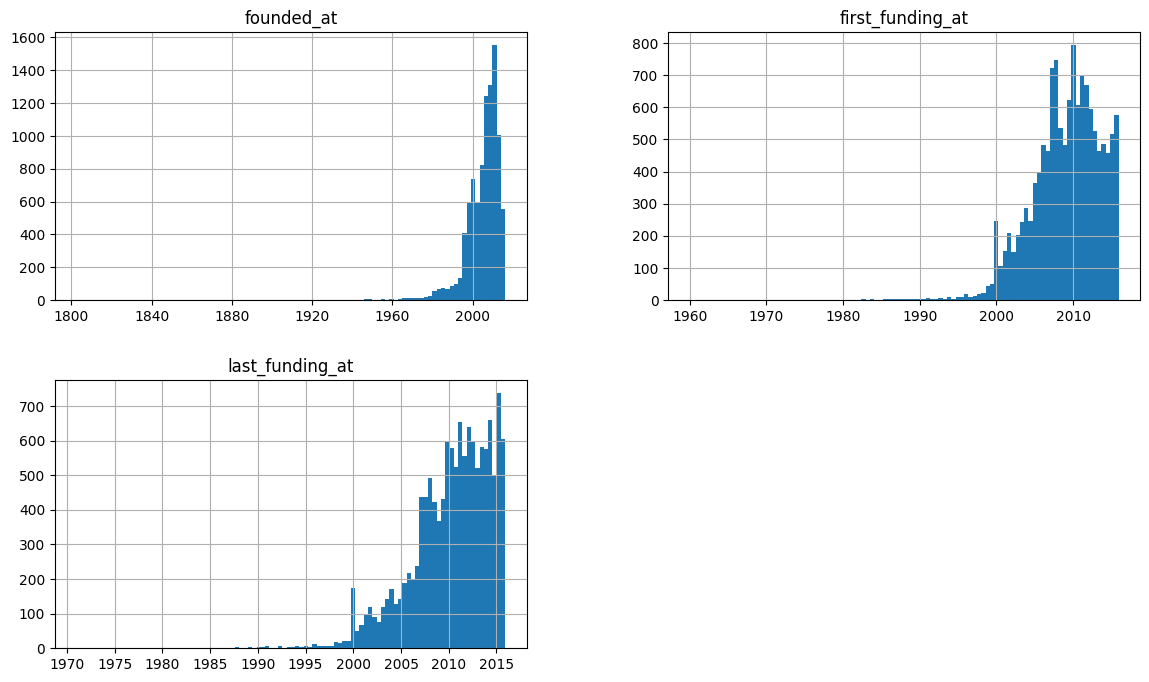

In [37]:
temp_df.hist(
    bins=100,
    figsize=(14, 8)
)

plt.show()

Lets check the validity of the datetime. Logically **it should be founded_at < first_funding_at < last_funding_at**.

In [38]:
invalid_first_funding_date = temp_df['founded_at'] > temp_df['first_funding_at']
invalid_last_funding_date = temp_df['founded_at'] > temp_df['last_funding_at']

invalid_date = np.logical_or(invalid_first_funding_date, invalid_last_funding_date)

invalid_date.value_counts()

False    12568
True       761
dtype: int64

It's quite a lot of invalid date! There are several way to handle it:
- Drop these rows.
- Replace all date value with *None*, then impute it in data preprocessing.
- Replace whether founded date or funding date witn *None*, then impute it in data preprocessing.

**Lets try option #3, we will replace the funding date**.

In [39]:
invalid_date_index = temp_df['first_funding_at'][invalid_date].index

In [40]:
temp_df['founded_at'][invalid_date_index] = None

### Separate Date Format

In [41]:
for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
    temp_date = pd.to_datetime(raw_data[item], errors='coerce')

    temp_df[f'day_{item}'] = temp_date.dt.day
    temp_df[f'month_{item}'] = temp_date.dt.month
    temp_df[f'year_{item}'] = temp_date.dt.year

In [42]:
cat_data = cat_data.loc[temp_df.index]

cat_data[temp_df.columns] = temp_df

cat_data = cat_data.drop(['founded_at', 'first_funding_at', 'last_funding_at'], axis=1)

cat_data.head()

,category_list,status,country_code,state_code,region,city,protocol_url,top_level_domain_url,day_founded_at,month_founded_at,year_founded_at,day_first_funding_at,month_first_funding_at,year_first_funding_at,day_last_funding_at,month_last_funding_at,year_last_funding_at
15,"[Apps, Cable, Distribution, Software]",success,USA,CA,SF Bay Area,Cupertino,http,com,1.0,3.0,2012.0,17.0,3.0,2015.0,17,3,2015
20,"[Art, E-Commerce, Marketplaces]",success,USA,WA,Seattle,Seattle,http,com,1.0,1.0,2009.0,15.0,5.0,2009.0,15,5,2009
23,[Curated Web],success,USA,CA,SF Bay Area,San Francisco,http,com,1.0,7.0,2010.0,1.0,1.0,2010.0,16,2,2011
31,[Analytics],success,USA,CA,SF Bay Area,San Francisco,http,com,16.0,9.0,2011.0,2.0,11.0,2011.0,30,11,2011
32,[Software],success,USA,NY,New York City,New York,http,com,1.0,1.0,2000.0,8.0,3.0,2010.0,8,3,2010


## EDA Conclusion

Lets wrap it up:
1. SInce our objective is predict if startup success or not (ipo, acquired, closed), **we drop the 'operating' status.**
2. **There are suspectible duplicate startup data so we drop those data**.
3. The funding_total_usd contains outliers (the lower bound one), since **it doesn't make any sense for someone to fund a startup by just 2 usd, so we use threshold 1000 usd for funding_total_usd.**
4. **Some startups have multiple categories in category_list**, we will transform it in data preprocessing later before do machine learning modeling.
5. **In the datetime, there are some non-sense input** (e. g. datetime that greater than today, first funding smaller than founded date, logically **it should be founded date < first funding < last**.
6. **Some categories have very few counts**, so **we will replace these categories with 'Others' value**.

Before move into data preprocessing, let's concat `num_data` and `cat_data`.

In [43]:
valid_index = np.array(list(set(num_data.index) & set(cat_data.index)))

full_data = pd.concat((num_data.loc[valid_index], cat_data.loc[valid_index]), axis=1).reset_index(drop=True)

full_data.head()

,funding_total_usd,funding_rounds,category_list,status,country_code,state_code,region,city,protocol_url,top_level_domain_url,day_founded_at,month_founded_at,year_founded_at,day_first_funding_at,month_first_funding_at,year_first_funding_at,day_last_funding_at,month_last_funding_at,year_last_funding_at
0,4900000.0,1,[Curated Web],success,USA,NV,Las Vegas,Las Vegas,http,com,NaN,NaN,NaN,26.0,10.0,2005.0,26,10,2005
1,NaN,3,"[Games, Technology]",success,CHN,30,Guangzhou,Guangzhou,http,com,1.0,4.0,2005.0,19.0,8.0,2008.0,21,11,2012
2,NaN,1,"[Email, Events, Facebook Applications, Games, ...",fail,NaN,NaN,NaN,NaN,http,com,15.0,9.0,1993.0,1.0,1.0,2010.0,1,1,2010
3,6499999.0,3,[Games],success,USA,WA,Seattle,Seattle,http,com,1.0,1.0,2009.0,1.0,10.0,2008.0,30,3,2011
4,NaN,1,[Curated Web],fail,USA,NY,New York City,New York,http,com,1.0,1.0,2008.0,1.0,1.0,2008.0,1,1,2008


# Data Preprocessing

## Data Split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    full_data.drop('status', axis=1),
    full_data[['status']],
    test_size=0.2,
    random_state=42
)

In [45]:
X_train.head()

,funding_total_usd,funding_rounds,category_list,country_code,state_code,region,city,protocol_url,top_level_domain_url,day_founded_at,month_founded_at,year_founded_at,day_first_funding_at,month_first_funding_at,year_first_funding_at,day_last_funding_at,month_last_funding_at,year_last_funding_at
3015,NaN,1,"[Education, Software]",CHN,30,Shenzhen,Shenzhen,http,com,1.0,1.0,2004.0,1.0,3.0,2007.0,1,3,2007
9185,24690000.0,4,"[Finance, FinTech, Fraud Detection, Identity, ...",GBR,L1,London,Richmond,http,com,1.0,1.0,2005.0,24.0,4.0,2006.0,23,4,2009
9145,11400000.0,3,"[Fashion, Games, Gamification, Internet, Onlin...",USA,NY,New York City,New York,http,com,14.0,10.0,2007.0,1.0,1.0,2008.0,17,11,2010
1971,11540000.0,2,[Semiconductors],USA,CA,Anaheim,Irvine,http,com,1.0,1.0,2000.0,18.0,4.0,2005.0,24,2,2008
2608,8000000.0,1,[Ticketing],EST,1,Tallinn,Tallinn,http,ee,1.0,1.0,1997.0,27.0,9.0,2013.0,27,9,2013


## Categorical Pipeline

### Multi Labet Encoder

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.base import BaseEstimator, TransformerMixin

class CategoryListEncoder(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = MultiLabelBinarizer(*args, **kwargs)
        
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=0):
        return self.encoder.transform(x)

class DfToSeries(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.iloc[:, 0]
    
multi_label = make_pipeline(
    DfToSeries(),
    CategoryListEncoder()
)

multi_label

Pipeline(steps=[('dftoseries', DfToSeries()),
                ('categorylistencoder',
                 <__main__.CategoryListEncoder object at 0x7fd05a095f50>)])

### Categorical Encoder

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(
    handle_unknown='ignore',
    min_frequency=0.5/100
)

encoder_trans = ColumnTransformer([
    ('Multi Label Binarizer', multi_label, ['category_list']),
    ('One Hot Encoder', onehot_enc, ['country_code', 'state_code', 'region',
                                     'city', 'protocol_url', 'top_level_domain_url']),
])

encoder_trans

ColumnTransformer(transformers=[('Multi Label Binarizer',
                                 Pipeline(steps=[('dftoseries', DfToSeries()),
                                                 ('categorylistencoder',
                                                  <__main__.CategoryListEncoder object at 0x7fd05a095f50>)]),
                                 ['category_list']),
                                ('One Hot Encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               min_frequency=0.005),
                                 ['country_code', 'state_code', 'region',
                                  'city', 'protocol_url',
                                  'top_level_domain_url'])])

### Full Categorical Pipeline

In [48]:
cat_pipeline = make_pipeline(
    encoder_trans
)

cat_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Multi Label Binarizer',
                                                  Pipeline(steps=[('dftoseries',
                                                                   DfToSeries()),
                                                                  ('categorylistencoder',
                                                                   <__main__.CategoryListEncoder object at 0x7fd05a095f50>)]),
                                                  ['category_list']),
                                                 ('One Hot Encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=0.005),
                                                  ['country_code', 'state_code',
                                                   'region', 'city',
                                                   'protocol_url',
                                                   'top_level_domain_url'])]))])

## Numerical Pipeline

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

## Full Pipeline

In [50]:
cat_columns = X_train.select_dtypes(include=object).columns
num_columns = X_train.select_dtypes(exclude=object).columns

In [51]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, f_classif

full_trans = ColumnTransformer([
    ('Categorical Pipeline', cat_pipeline, cat_columns),
    ('Numerical Pipeline', num_pipeline, num_columns)    
])

full_pipeline = make_pipeline(
    full_trans,
    SelectKBest(f_classif, k=512)
)

full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical Pipeline',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(transformers=[('Multi '
                                                                                                    'Label '
                                                                                                    'Binarizer',
                                                                                                    Pipeline(steps=[('dftoseries',
                                                                                                                     DfToSeries()),
                                                                                                                    ('categorylistencoder',
                                                                                                                     <__main__.CategoryListEncoder object at 0x7fd05a095f50>)]),
                                                                                                    ['category_list']),
                                                                                                   ('One '
                                                                                                    'Hot '
                                                                                                    'Encoder'...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['funding_total_usd', 'funding_rounds', 'day_founded_at',
       'month_founded_at', 'year_founded_at', 'day_first_funding_at',
       'month_first_funding_at', 'year_first_funding_at',
       'day_last_funding_at', 'month_last_funding_at', 'year_last_funding_at'],
      dtype='object'))])),
                ('selectkbest', SelectKBest(k=512))])

### Target Pipeline

In [52]:
from sklearn.preprocessing import OrdinalEncoder

target_pipeline = OrdinalEncoder()

target_pipeline

OrdinalEncoder()

## Data Transformation

In [53]:
full_pipeline.fit(X_train, y_train)

/home/alfian/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical Pipeline',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(transformers=[('Multi '
                                                                                                    'Label '
                                                                                                    'Binarizer',
                                                                                                    Pipeline(steps=[('dftoseries',
                                                                                                                     DfToSeries()),
                                                                                                                    ('categorylistencoder',
                                                                                                                     <__main__.CategoryListEncoder object at 0x7fd05a095f50>)]),
                                                                                                    ['category_list']),
                                                                                                   ('One '
                                                                                                    'Hot '
                                                                                                    'Encoder'...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['funding_total_usd', 'funding_rounds', 'day_founded_at',
       'month_founded_at', 'year_founded_at', 'day_first_funding_at',
       'month_first_funding_at', 'year_first_funding_at',
       'day_last_funding_at', 'month_last_funding_at', 'year_last_funding_at'],
      dtype='object'))])),
                ('selectkbest', SelectKBest(k=512))])

In [54]:
target_pipeline.fit(y_train)

OrdinalEncoder()

In [71]:
target_pipeline.categories_

[array(['fail', 'success'], dtype=object)]

In [55]:
X_train_trans, X_test_trans = full_pipeline.transform(X_train), full_pipeline.transform(X_test)

y_train_trans, y_test_trans = target_pipeline.transform(y_train), target_pipeline.transform(y_test)

/home/alfian/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Edutainment', 'Estimation and Quoting', 'Face Recognition', 'Families', 'Field Support Services', 'Flowers', 'Game Mechanics', 'Heavy Industry', 'Indians', 'Internet Infrastructure', 'Landscaping', 'Moneymaking', 'Online Auctions', 'Q&A', 'Social Media Agent', 'TV Production', 'User Interface'] will be ignored
  warnings.warn(


In [56]:
full_train = np.concatenate(
    (X_train_trans, y_train_trans),
    axis=1
)

# Modeling

## Classical Algorithm

In [57]:
from pycaret import classification

auto_setup = classification.setup(
    data=full_train,
    target=-1,
    train_size=0.85,
    preprocess=False,
    session_id=42
)

,Description,Value
0,Session id,42
1,Target,feature_513
2,Target type,Binary
3,Original data shape,"(10660, 513)"
4,Transformed data shape,"(10660, 513)"
5,Transformed train set shape,"(9061, 513)"
6,Transformed test set shape,"(1599, 513)"
7,Numeric features,512


In [58]:
models = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7615,0.8340,0.8132,0.7572,0.7841,0.5184,0.5203,1.6120
lightgbm,Light Gradient Boosting Machine,0.7606,0.8438,0.8119,0.7566,0.7832,0.5167,0.5185,0.2460
gbc,Gradient Boosting Classifier,0.7569,0.8364,0.8009,0.7569,0.7782,0.5096,0.5108,2.2180
xgboost,Extreme Gradient Boosting,0.7560,0.8354,0.8003,0.7560,0.7775,0.5078,0.5090,7.2440
ada,Ada Boost Classifier,0.7498,0.8284,0.8030,0.7467,0.7737,0.4948,0.4966,0.5680
lr,Logistic Regression,0.7317,0.8102,0.7765,0.7349,0.7551,0.4590,0.4600,1.5320
et,Extra Trees Classifier,0.7304,0.8033,0.7925,0.7265,0.7580,0.4549,0.4572,2.6380
ridge,Ridge Classifier,0.7262,0.0000,0.7923,0.7213,0.7551,0.4462,0.4488,0.1570
lda,Linear Discriminant Analysis,0.7260,0.7982,0.7941,0.7203,0.7554,0.4456,0.4485,1.0780
svm,SVM - Linear Kernel,0.7179,0.0000,0.7034,0.7525,0.7257,0.4360,0.4386,0.3440


Random forest model get the best score, while light gradient boosting machine model's performance slightly under the random forest model.

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train_trans, y_train_trans)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

## Neural Network

In [62]:
from tensorflow.keras import Sequential, layers

nn_model = Sequential([
    layers.Dense(1024, activation='sigmoid'),
    layers.Dense(3, activation='softmax')
])

In [63]:
from tensorflow.keras import optimizers

nn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.00005),
    metrics='accuracy'
)

In [65]:
from tensorflow.keras import callbacks

fit_hist = nn_model.fit(
    X_train_trans,
    y_train_trans,
    epochs=200,
    validation_split=0.15,
    callbacks=[
        callbacks.EarlyStopping(patience=20, restore_best_weights=True)
    ]
)

2023-05-12 22:48:31.540086: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18556928 exceeds 10% of free system memory.


Epoch 1/200
284/284 [==============================] - 5s 13ms/step - loss: 0.6565 - accuracy: 0.6635 - val_loss: 0.6042 - val_accuracy: 0.7154
Epoch 2/200
284/284 [==============================] - 3s 10ms/step - loss: 0.5770 - accuracy: 0.7177 - val_loss: 0.5719 - val_accuracy: 0.7148
Epoch 3/200
284/284 [==============================] - 3s 10ms/step - loss: 0.5535 - accuracy: 0.7249 - val_loss: 0.5592 - val_accuracy: 0.7217
Epoch 4/200
284/284 [==============================] - 3s 10ms/step - loss: 0.5427 - accuracy: 0.7338 - val_loss: 0.5514 - val_accuracy: 0.7261
Epoch 5/200
284/284 [==============================] - 3s 11ms/step - loss: 0.5363 - accuracy: 0.7342 - val_loss: 0.5478 - val_accuracy: 0.7230
Epoch 6/200
284/284 [==============================] - 3s 10ms/step - loss: 0.5307 - accuracy: 0.7350 - val_loss: 0.5435 - val_accuracy: 0.7286
Epoch 7/200
284/284 [==============================] - 3s 11ms/step - loss: 0.5280 - accuracy: 0.7397 - val_loss: 0.5425 - val_accuracy:

<Axes: >

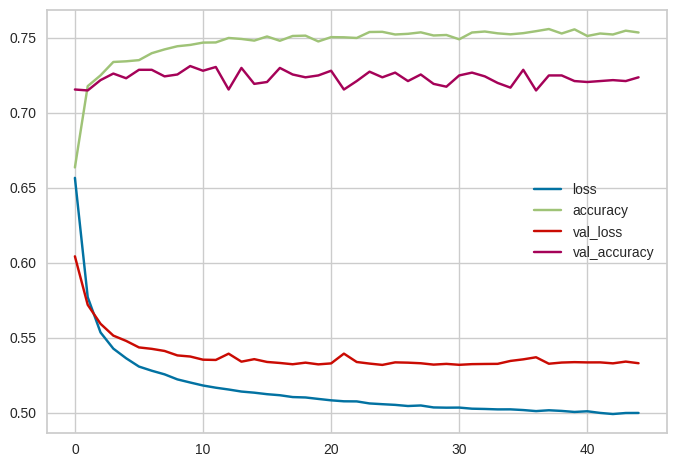

In [66]:
pd.DataFrame(fit_hist.history).plot()